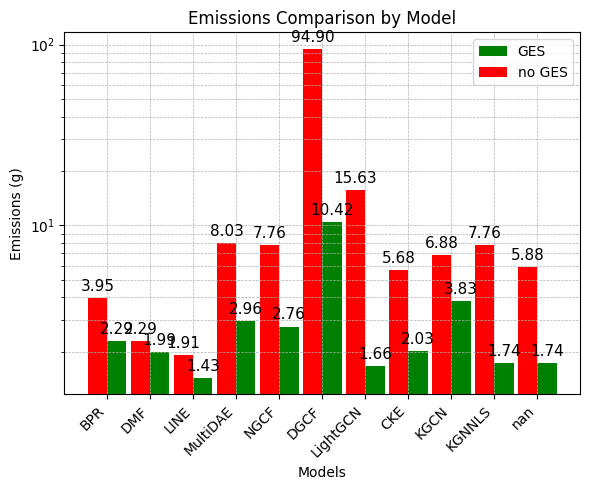

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# settings range from 1 to 6
# they follow the same order in the columns on table 1 on the paper
# 1: treshold=high, tolerance=low
# 2: treshold=high, tolerance=moderate
# 3: treshold=high, tolerance=high
# 4: treshold=low, tolerance=low
# 5: treshold=low, tolerance=moderate
# 6: treshold=low, tolerance=high


setting = 1

# Load data
df_emissions = pd.read_csv(f'emissions_s{setting}.tsv', sep='\t')

# Desired order for models
model_order = [
    "BPR", "DMF", "LINE", "MultiDAE", "NGCF", "DGCF", 
    "LightGCN", "CKE", "CFKG", "KGCN", "KGNNLS"
]

# Ensure the data is ordered based on the specified model order
df_emissions['model'] = pd.Categorical(df_emissions['model'], categories=model_order, ordered=True)
df_emissions = df_emissions.sort_values('model')

# Prepare data for bar plot
original_emissions = df_emissions['emissions_original']
criteria_emissions = df_emissions['emissions_criteria']
models = df_emissions['model']

# Plotting
x = np.arange(len(models))  # Label locations
width = 0.45  # Bar width

fig, ax = plt.subplots(figsize=(6, 5))

# Bars for original and criteria emissions
bars_criteria = ax.bar(x + width/2, criteria_emissions, width, label='GES', color='green')
bars_original = ax.bar(x - width/2, original_emissions, width, label='no GES', color='red')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Emissions (g)')
ax.set_title('Emissions Comparison by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Annotate bars with values
for bars in [bars_original, bars_criteria]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11)

# Layout and show
plt.yscale('log')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig(f'graphs/setting{setting}_emiss.png', bbox_inches='tight')
plt.show()


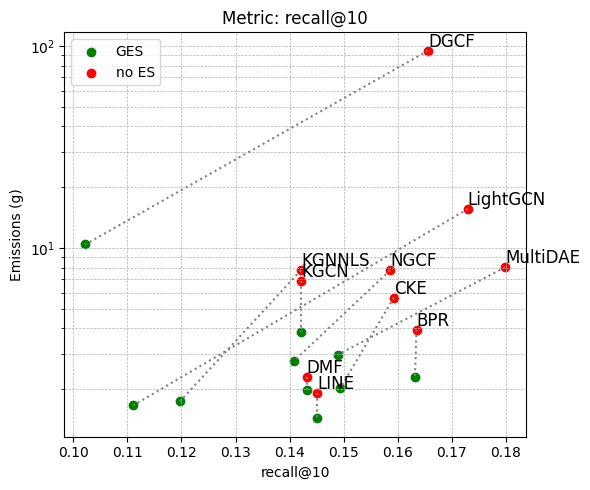

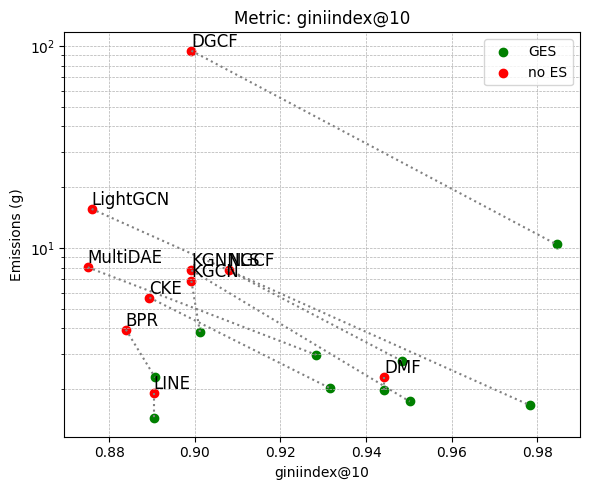

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

setting = 1

df_emissions = pd.read_csv(f'emissions_s{setting}.tsv', sep='\t')
df_metrics = pd.read_csv(f'metrics_s{setting}.tsv', sep='\t')

# Unique metrics
metrics = df_metrics['metric'].unique()
metrics = ['recall@10', 'giniindex@10']

# Iterate through each metric
for metric in metrics:
    # Filter rows corresponding to the current metric
    df_metric = df_metrics[df_metrics['metric'] == metric]
    
    # Merge emissions and metric data on 'model'
    merged = df_emissions[['model', 'emissions_original', 'emissions_criteria']].merge(
        df_metric[['model', 'value_original', 'value_criteria']],
        on='model'
    )
    
    # Plotting
    plt.figure(figsize=(6,5))
    for _, row in merged.iterrows():
        # Scatter points
        plt.scatter(row['value_criteria'], row['emissions_criteria'], color='green', label='GES' if _ == 0 else "")
        plt.scatter(row['value_original'], row['emissions_original'], color='red', label='no ES' if _ == 0 else "")
        
        # Line connecting the points
        plt.plot(
            [row['value_original'], row['value_criteria']],
            [row['emissions_original'], row['emissions_criteria']],
            linestyle='dotted',
            color='gray'
        )
        
        # Add label near the red point
        label_x = row['value_original'] # * (max(merged['value_original']) - min(merged['value_original']))
        label_y = row['emissions_original']# * (max(merged['emissions_original']) - min(merged['emissions_original']))
        plt.text(label_x, label_y, row['model'], fontsize=12, ha='left', va='bottom', color='black')
    
    # Set logarithmic scale for emissions (now on Y-axis)
    plt.yscale('log')
    
    # Labels and title
    plt.title(f'Metric: {metric}')
    plt.xlabel(f'{metric}')
    plt.ylabel('Emissions (g)')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.savefig(f'graphs/setting{setting}_{metric}.png', bbox_inches='tight')
    plt.show()
